In [1]:
# For ndarray handling:
import numpy as np

# For plotting:
import matplotlib
import matplotlib.pyplot as plt

# For deep learning functionality
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import SimpleRNN, LSTM

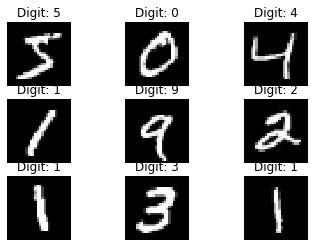

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Get the one-hot encoded labels
n_class = len(np.unique(y_train))
Y_train = np.eye(n_class)[y_train]
Y_test = np.eye(n_class)[y_test]

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title(f'Digit: {y_train[i]}')
    plt.axis('off')

In [5]:
# Normalize the data to help with training
X_train_LSTM = X_train
X_test_LSTM = X_test
X_train_LSTM = X_train_LSTM.astype('float32')
X_test_LSTM = X_test_LSTM.astype('float32')
X_train_LSTM /= 255
X_test_LSTM /= 255

# Create the model using Sequential object
model = Sequential()

# Create the first hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(LSTM(8))
model.add(Activation('tanh'))                         
model.add(Dropout(0.2))

# Create the output layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model ready for training
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.build(X_train_LSTM.shape)
model.summary()

history = model.fit(X_train_LSTM, Y_train, epochs=15, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (60000, 8)                1184      
                                                                 
 activation_4 (Activation)   (60000, 8)                0         
                                                                 
 dropout_2 (Dropout)         (60000, 8)                0         
                                                                 
 dense_2 (Dense)             (60000, 10)               90        
                                                                 
 activation_5 (Activation)   (60000, 10)               0         
                                                                 
Total params: 1,274
Trainable params: 1,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15


2022-04-15 11:36:46.095845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-15 11:36:46.193237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-15 11:36:46.258224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1497/1500 [============================>.] - ETA: 0s - loss: 1.6348 - accuracy: 0.4571

2022-04-15 11:37:06.114471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-15 11:37:06.158174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 24s 15ms/step - loss: 1.6339 - accuracy: 0.4574 - val_loss: 1.0538 - val_accuracy: 0.6893
Epoch 2/15
1500/1500 [==============================] - 22s 14ms/step - loss: 1.0091 - accuracy: 0.6729 - val_loss: 0.7908 - val_accuracy: 0.7472
Epoch 3/15
1500/1500 [==============================] - 22s 14ms/step - loss: 0.8577 - accuracy: 0.7201 - val_loss: 0.6801 - val_accuracy: 0.7837
Epoch 4/15
1500/1500 [==============================] - 23s 15ms/step - loss: 0.7646 - accuracy: 0.7550 - val_loss: 0.6052 - val_accuracy: 0.8163
Epoch 5/15
1500/1500 [==============================] - 22s 14ms/step - loss: 0.6920 - accuracy: 0.7893 - val_loss: 0.5177 - val_accuracy: 0.8436
Epoch 6/15
1500/1500 [==============================] - 22s 14ms/step - loss: 0.6388 - accuracy: 0.8076 - val_loss: 0.4858 - val_accuracy: 0.8570
Epoch 7/15
1500/1500 [==============================] - 22s 15ms/step - loss: 0.6016 - accuracy: 0.8214 - val_loss: 0.4590 - val_accura

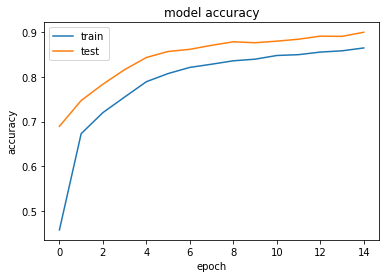

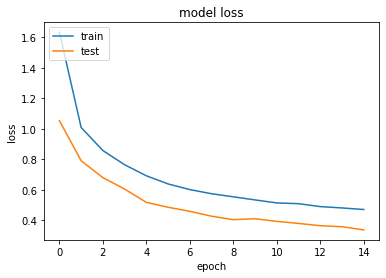

In [6]:
# Summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
predicted_probability = model.predict(X_test_LSTM)

predicted_classes = np.argmax(predicted_probability, axis=-1)

correct_preds = np.nonzero(predicted_classes == y_test)[0]
incorrect_preds = np.nonzero(predicted_classes != y_test)[0]
print(f'{len(correct_preds)} classified correctly')
print(f'{len(incorrect_preds)} classified incorrectly')
print(f'{len(correct_preds) / len(y_test) * 100}% of test set classified correctly')

2022-04-15 11:43:57.568446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-15 11:43:57.606385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8943 classified correctly
1057 classified incorrectly
89.42999999999999% of test set classified correctly
